In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("D:\YUKTA\Assignment\DS\Multi Linear Regression\ToyotaCorolla.csv")

In [3]:
data = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [4]:
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB
None


# EDA

In [6]:
print('The summary statistics is:\n\n',data.describe())

The summary statistics is:

               Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000  

In [7]:
# To check for missing values:
print(data.isnull().sum())
print('\nThe data has no missing values')

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

The data has no missing values


**Checking the histogram plot for independent variables:**

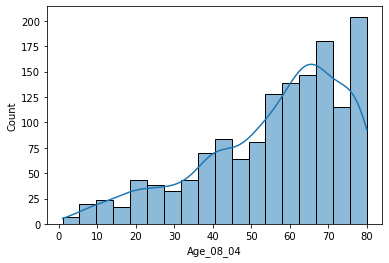

In [8]:
sns.histplot(data['Age_08_04'], kde = True)
plt.show()

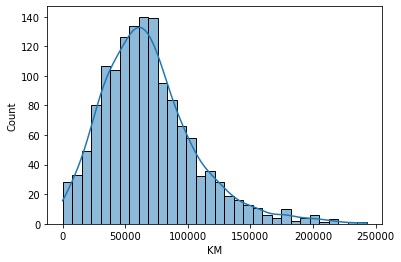

In [9]:
sns.histplot(data['KM'], kde = True)
plt.show()

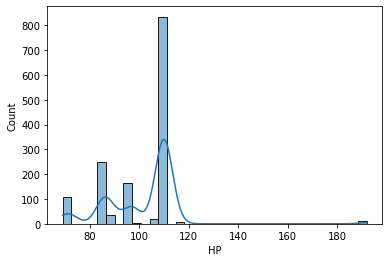

In [10]:
sns.histplot(data['HP'], kde = True)
plt.show()

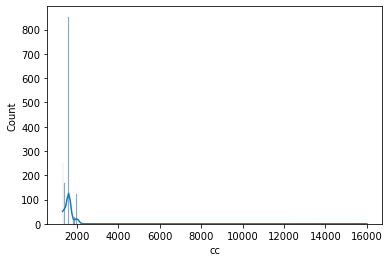

In [11]:
sns.histplot(data['cc'], kde = True)
plt.show()

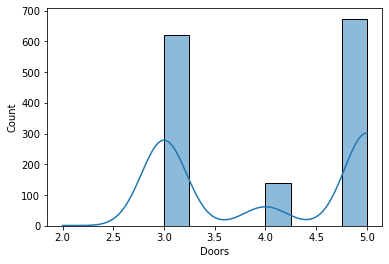

In [12]:
sns.histplot(data['Doors'], kde = True)
plt.show()

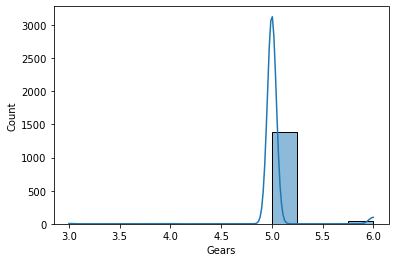

In [13]:
sns.histplot(data['Gears'], kde = True)
plt.show()

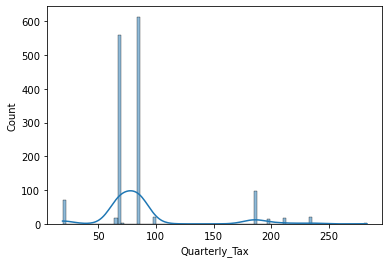

In [14]:
sns.histplot(data['Quarterly_Tax'], kde = True)
plt.show()

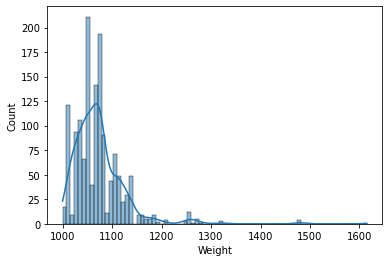

In [15]:
sns.histplot(data['Weight'], kde = True)
plt.show()

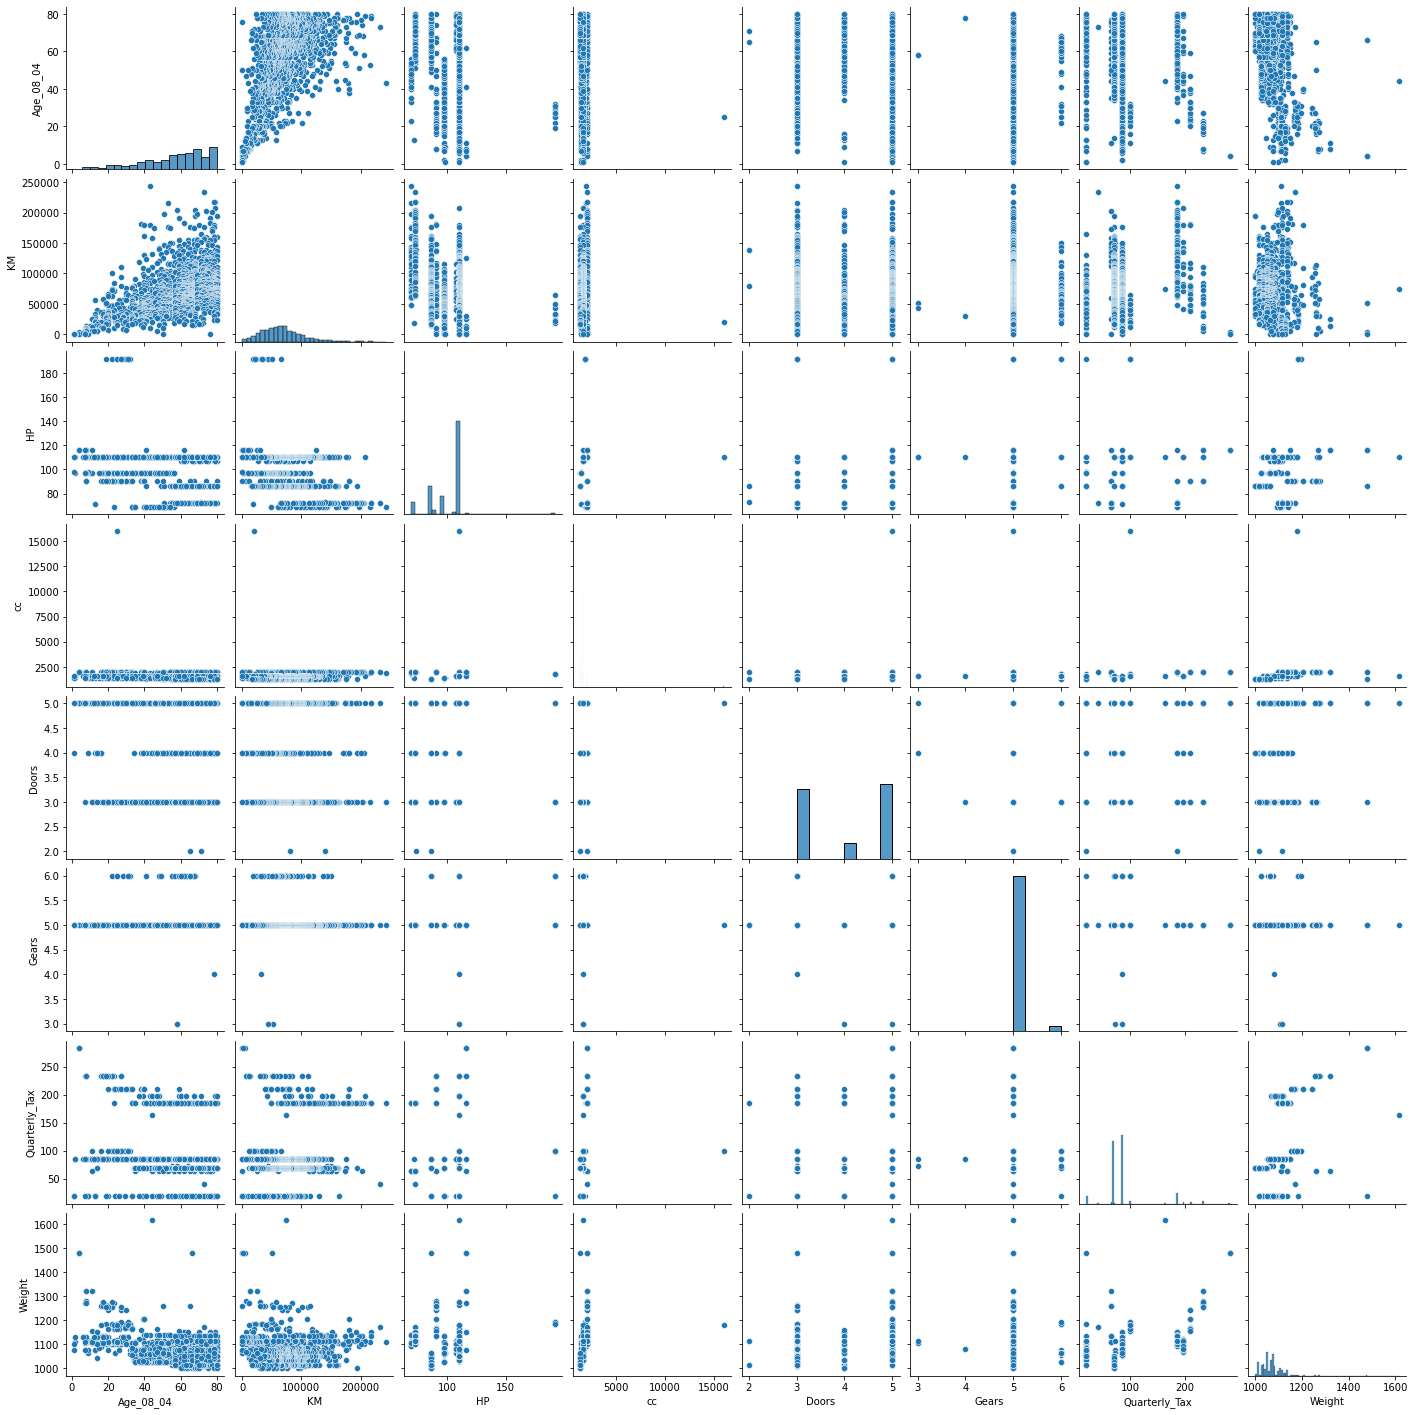

In [16]:
sns.pairplot(data[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]])
plt.show()

**Correlation Heatmap**

In [17]:
correlation_matrix = data[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]].corr()

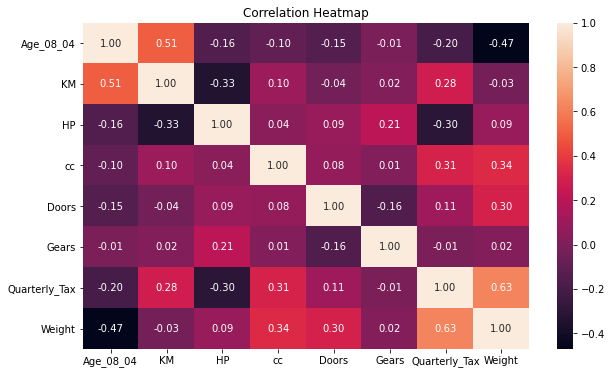

In [18]:
plt.figure(figsize=(10,6))

sns.heatmap(correlation_matrix, annot = True,fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Preparing a Model

In [19]:
import statsmodels.formula.api as smf

In [20]:
x = data[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
y = data['Price']

In [21]:
model = smf.ols('y~x', data=data).fit()

In [22]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 05 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:57:32   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.0

In [23]:
# Coefficients
model.params

Intercept   -5573.106358
x[0]         -121.658402
x[1]           -0.020817
x[2]           31.680906
x[3]           -0.121100
x[4]           -1.616641
x[5]          594.319936
x[6]            3.949081
x[7]           16.958632
dtype: float64

In [24]:
# t and p values
print('t_values:','\n',model.tvalues,'\n','\n','p_values:','\n',model.pvalues)

t_values: 
 Intercept    -3.948666
x[0]        -46.511852
x[1]        -16.621622
x[2]         11.241018
x[3]         -1.344222
x[4]         -0.040410
x[5]          3.016007
x[6]          3.014535
x[7]         15.879803
dtype: float64 
 
 p_values: 
 Intercept     8.241949e-05
x[0]         3.354724e-288
x[1]          7.538439e-57
x[2]          3.757218e-28
x[3]          1.790902e-01
x[4]          9.677716e-01
x[5]          2.606549e-03
x[6]          2.619148e-03
x[7]          2.048576e-52
dtype: float64


In [25]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

# Calculating VIF

In [26]:
x1 = data[["Age_08_04"]]
x2 = data[["KM"]]
x3 = data[["HP"]]
x4 = data[["cc"]]
x5 = data[["Doors"]]
x6 = data[["Gears"]]
x7 = data[["Quarterly_Tax"]]
x8 = data[["Weight"]]

In [27]:
rsq_x1 = smf.ols('x1~x2+x3+x4+x5+x6+x7+x8', data = data).fit().rsquared
vif_x1 = 1/(1-rsq_x1)

rsq_x2 = smf.ols('x2~x1+x3+x4+x5+x6+x7+x8', data = data).fit().rsquared
vif_x2 = 1/(1-rsq_x2)

rsq_x3 = smf.ols('x3~x1+x2+x4+x5+x6+x7+x8', data = data).fit().rsquared
vif_x3 = 1/(1-rsq_x3)

rsq_x4 = smf.ols('x4~x1+x2+x3+x5+x6+x7+x8', data = data).fit().rsquared
vif_x4 = 1/(1-rsq_x4)

rsq_x5 = smf.ols('x5~x1+x2+x3+x4+x6+x7+x8', data = data).fit().rsquared
vif_x5 = 1/(1-rsq_x5)

rsq_x6 = smf.ols('x6~x1+x2+x3+x4+x5+x7+x8', data = data).fit().rsquared
vif_x6 = 1/(1-rsq_x6)

rsq_x7 = smf.ols('x7~x1+x2+x3+x4+x5+x6+x8', data = data).fit().rsquared
vif_x7 = 1/(1-rsq_x7)

rsq_x8 = smf.ols('x8~x1+x2+x3+x4+x5+x6+x7', data = data).fit().rsquared
vif_x8 = 1/(1-rsq_x8)

# Storing VIF values into a dataframe:
d = {'Variables':["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"],
     'VIF':[vif_x1,vif_x2,vif_x3,vif_x4,vif_x5,vif_x6,vif_x7,vif_x8]}
vif = pd.DataFrame(d)
print(vif)

       Variables       VIF
0      Age_08_04  1.884620
1             KM  1.756905
2             HP  1.419422
3             cc  1.163894
4          Doors  1.156575
5          Gears  1.098723
6  Quarterly_Tax  2.311431
7         Weight  2.516420


Quarterly_Tax and Weight has higher VIF values indicating more multicollinearity among all the variables

# To fit MLR model:

In [28]:
mse1 = np.mean(model.resid ** 2)
print('mean square error',mse1)
print("Root mean squared error:", np.sqrt(mse1).round(3))

mean square error 1790935.6083902945
Root mean squared error: 1338.258


In [29]:
r_squared = model.rsquared
print("R-squared:", round(r_squared, 3))

R-squared: 0.864


In [30]:
# multicollinearity check
rsquared = model.rsquared
vif = 1 / (1-rsquared)
print("vif value", vif)

vif value 7.340136219395173


A VIF value of 7.34 indicates a moderate to high level of multicollinearity, suggesting that the predictor variable is highly correlated with other predictor variables in the model.

**Residual Analysis**

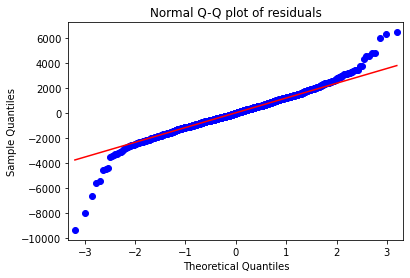

In [31]:
# Test for Normality of Residuals (Q-Q Plot)
import matplotlib.pyplot as plt
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

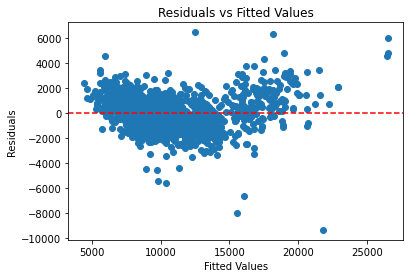

In [32]:
# Homoscedasticity
residuals = model.resid
fitted_values = model.fittedvalues

plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

In [33]:
def get_standardized_values(vals):
    return (vals - vals.mean()) / vals.std()

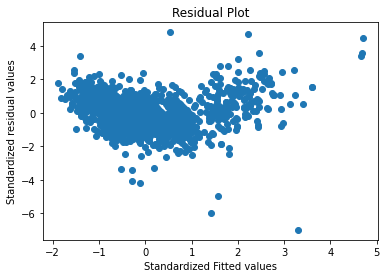

In [34]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

**Residual VS Regressors**

In [35]:
import statsmodels.api as sm

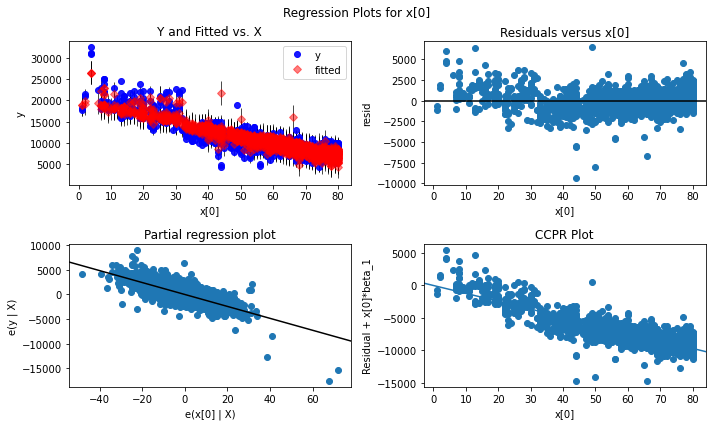

In [36]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model,"x[0]", fig=fig)
plt.show()

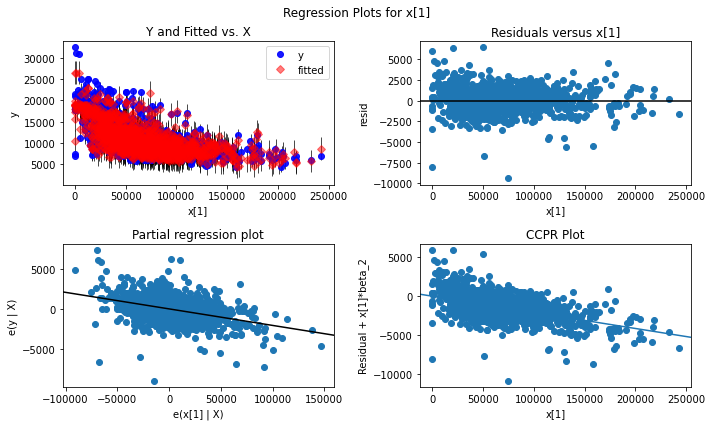

In [37]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model,"x[1]", fig=fig)
plt.show()

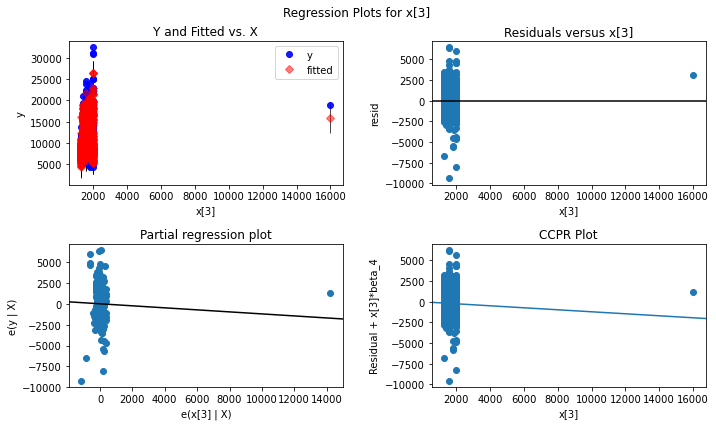

In [38]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model,"x[3]", fig=fig)
plt.show()

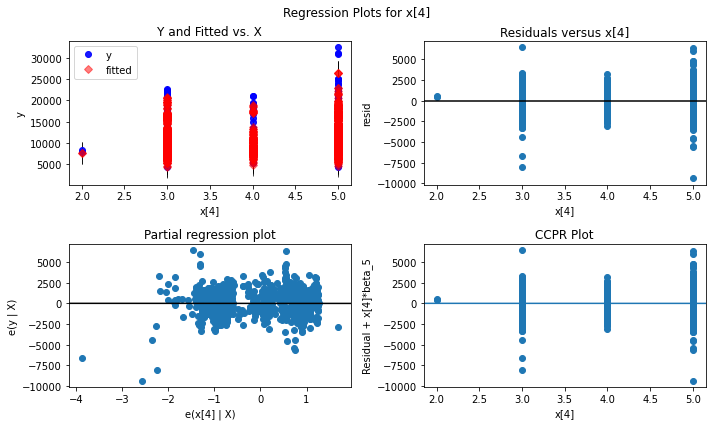

In [39]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model,"x[4]", fig=fig)
plt.show()

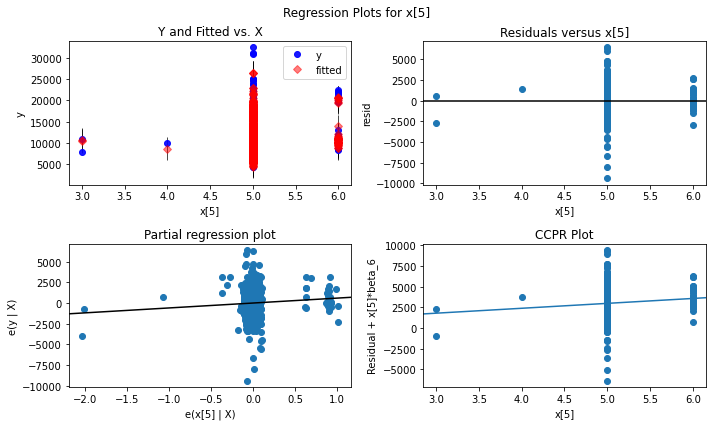

In [40]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model,"x[5]", fig=fig)
plt.show()

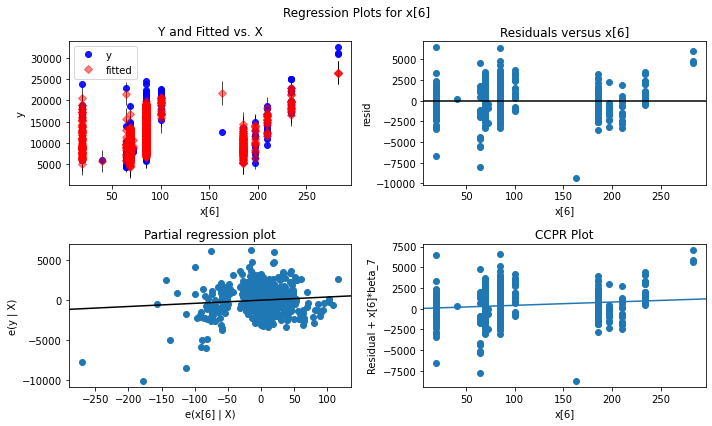

In [41]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model,"x[6]", fig=fig)
plt.show()

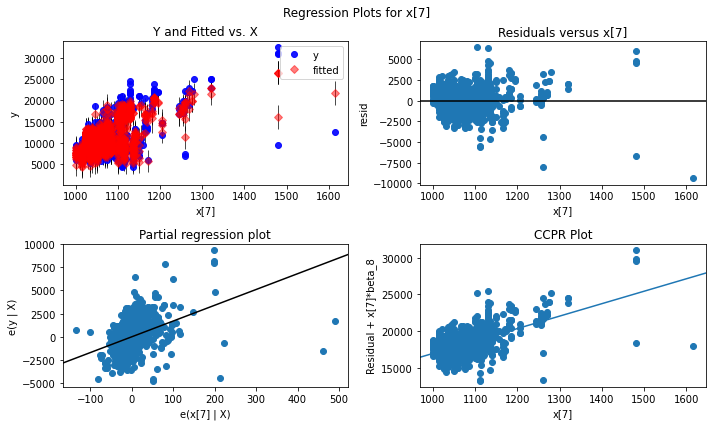

In [42]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model,"x[7]", fig=fig)
plt.show()

**Cook's Distance**

In [44]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

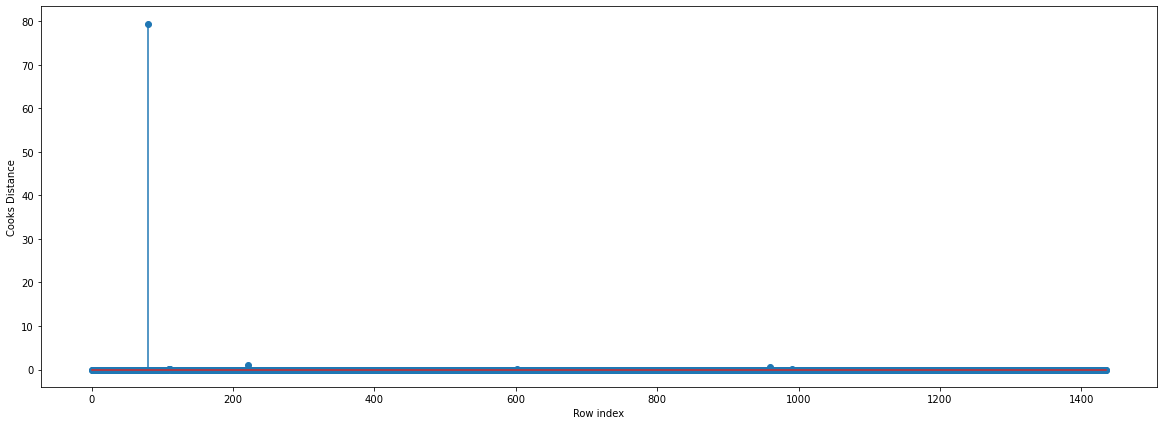

In [45]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 1))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [46]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624138717)

**High Influence Points**

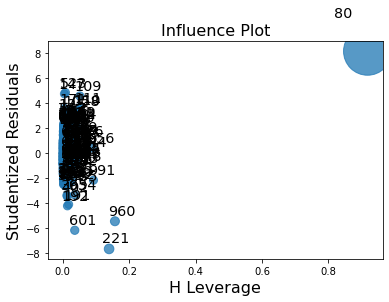

In [47]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [48]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k+1)/n)

From the above plot, it is evident that data points 80, 221, 601, 960 are the influencers

In [49]:
data[data.index.isin([80,221,601,960])]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180
221,12450,44,74172,110,1600,5,5,163,1615
601,7500,50,1,90,2000,3,5,64,1260
960,9390,66,50806,86,1300,3,5,19,1480


In [50]:
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Improving the model

In [51]:
#load the data
data_new = pd.read_csv("D:\YUKTA\Assignment\DS\Multi Linear Regression\ToyotaCorolla.csv")

In [52]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data1 = data_new.drop(data_new.index[[80,221,601,960]],axis=0).reset_index()

In [53]:
#Drop the original index
data1=data1.drop(['index'],axis=1)

# Build Model

In [54]:
x1 = data1[["Age_08_04"]]
x2 = data1[["KM"]]
x3 = data1[["HP"]]
x4 = data1[["cc"]]
x5 = data1[["Doors"]]
x6 = data1[["Gears"]]
x7 = data1[["Quarterly_Tax"]]
x8 = data1[["Weight"]]

In [55]:
#Exclude variable 'Quarterly_Tax' and generate R-squared and AIC values
final_ml_1 = smf.ols('Price~x1+x2+x3+x4+x5+x6+x8', data = data1).fit()

In [56]:
(final_ml_1.rsquared, final_ml_1.aic)

(0.8888522335939621, 24404.368744724285)

In [57]:
#Exclude variable 'Weight' and generate R-squared and AIC values
final_ml_2 = smf.ols('Price~x1+x2+x3+x4+x5+x6+x7', data = data1).fit()

In [58]:
(final_ml_2.rsquared, final_ml_2.aic)

(0.8405183870492152, 24921.41825157803)

Comparing above R_squared and AIC values, model **'final_ml_1'** has high R-square and low AIC value hence including variable **'Weight'**  to resolve the problem of multicollinearity

# Cook's Distance

In [59]:
model_influence = final_ml_1.get_influence()
(c_V, _) = model_influence.cooks_distance

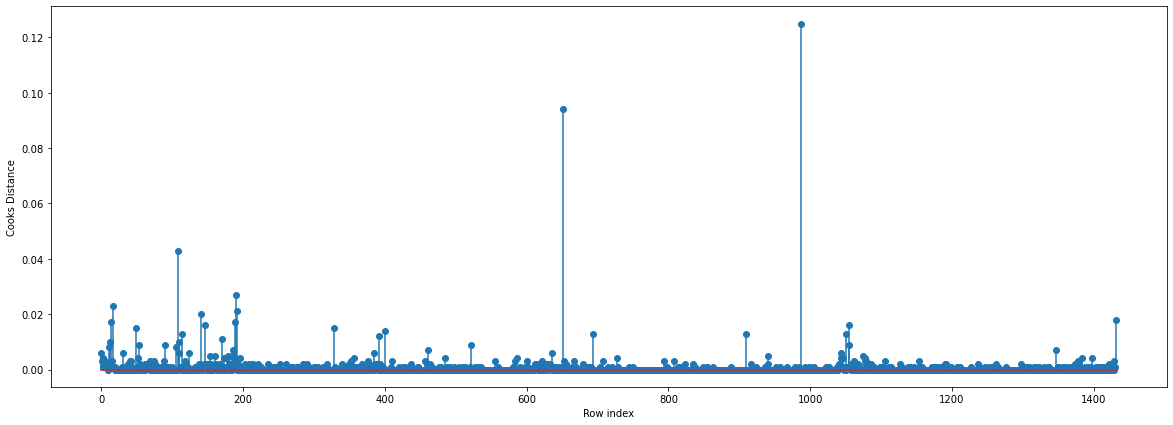

In [60]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [61]:
#index of the data points where c is more than .1
(np.argmax(c_V),np.max(c_V))

(987, 0.12470624762969641)

Since the value is <1, we can stop the diagnostic process and finalize the model

**FINAL MODEL**

In [62]:
#Check the accuracy of the model
final_ml_1 = smf.ols('Price~x1+x2+x3+x4+x5+x6+x8', data = data1).fit()

(final_ml_1.rsquared, final_ml_1.aic)

(0.8888522335939621, 24404.368744724285)

# Transformations

In [63]:
x1 = data1[["Age_08_04"]]
x2 = data1[["KM"]]
x3 = data1[["HP"]]
x4 = data1[["cc"]]
x5 = data1[["Doors"]]
x6 = data1[["Gears"]]
x8 = data1[["Weight"]]
y = data1[["Price"]]

In [64]:
r2 = final_ml_2.rsquared

**1) Log Transformation**

In [65]:
data1['x1'] = np.log(data1["Age_08_04"])
data1['x2'] = np.log(data1["KM"])
data1['x3'] = np.log(data1["HP"])
data1['x4'] = np.log(data1["cc"])
data1['x5'] = np.log(data1["Doors"])
data1['x6'] = np.log(data1["Gears"])
data1['x8'] = np.log(data1["Weight"])

In [66]:
df_log = data1[['x1','x2','x3','x4','x5','x6','x8','Price']]

In [67]:
ml_log = smf.ols('Price~x1+x2+x3+x4+x5+x6+x8', data = df_log).fit()
r2_log_transformed = ml_log.rsquared

**2) Square Transformation**

In [68]:
data1['x1_sq'] = (data1["Age_08_04"])**2
data1['x2_sq'] = (data1["KM"])**2
data1['x3_sq'] = (data1["HP"])**2
data1['x4_sq'] = (data1["cc"])**2
data1['x5_sq'] = (data1["Doors"])**2
data1['x6_sq'] = (data1["Gears"])**2
data1['x8_sq'] = (data1["Weight"])**2

In [69]:
df_square = data1[['x1_sq','x2_sq','x3_sq','x4_sq','x5_sq','x6_sq','x8_sq','Price']]

In [70]:
ml_square = smf.ols('Price~x1_sq+x2_sq+x3_sq+x4_sq+x5_sq+x6_sq+x8_sq', data = df_square).fit()
r2_square_transformed = ml_square.rsquared

**3) Square-Root Transformation**

In [71]:
data1['x1_sqrt'] = np.sqrt(data1["Age_08_04"])
data1['x2_sqrt'] = np.sqrt(data1["KM"])
data1['x3_sqrt'] = np.sqrt(data1["HP"])
data1['x4_sqrt'] = np.sqrt(data1["cc"])
data1['x5_sqrt'] = np.sqrt(data1["Doors"])
data1['x6_sqrt'] = np.sqrt(data1["Gears"])
data1['x8_sqrt'] = np.sqrt(data1["Weight"])

In [74]:
df_sqrt = data1[['x1_sqrt','x2_sqrt','x3_sqrt','x4_sqrt','x5_sqrt','x6_sqrt','x8_sqrt','Price']]

In [75]:
ml_sqrt = smf.ols('Price ~ x1_sqrt + x2_sqrt + x3_sqrt + x4_sqrt + x5_sqrt + x6_sqrt + x8_sqrt', data=df_sqrt).fit()
r2_sqrt_transformed = ml_sqrt.rsquared

In [76]:
results = pd.DataFrame({
    'Transformation': ['None', 'Log', 'Square', 'Square Root'],
    'R-squared values': [r2, r2_log_transformed, r2_square_transformed, r2_sqrt_transformed]
})

print(results)

  Transformation  R-squared values
0           None          0.840518
1            Log          0.848800
2         Square          0.854424
3    Square Root          0.892367
